<a href="https://colab.research.google.com/github/alind-saxena/Credit-Risk-Analysis/blob/EDA_notebook/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [0]:
import datetime

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
eda_df = pd.read_csv('/content/drive/My Drive/lending-club/accepted_2007_to_2018Q4.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
eda_df.shape

(2260701, 151)

In [0]:
eda_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
eda_df.describe(include='all')

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,2260701.0,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2260668,2.260668e+06,2.260668e+06,2260668,2260668,2093699,2113761,2260668,2.260664e+06,2260668,2260668,2260668,2260668,2260668,126067,2260668,2237343,2260667,2260668,2.258957e+06,2.260639e+06,2260639,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2260668,2.260668e+06,2.260668e+06,...,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,2260668,10917,10917,10917,10917.0,10917.000000,10917,10917,10917,10917.0,10917.000000,10917,8651.000000,10917.000000,10917.000000,2260668,2260668,34246,34246,34246,34246.000000,34246.000000,34246.000000
unique,2260701.0,NaN,NaN,NaN,NaN,2,NaN,NaN,7,35,512694,11,6,NaN,3,139,9,2,2260668,124501,14,63155,956,51,NaN,NaN,754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,9,3,NaN,NaN,27,28,27,NaN,NaN,5,NaN,NaN,NaN,2,2,83,3,90,NaN,NaN,NaN
top,83886078.0,NaN,NaN,NaN,NaN,36 months,NaN,NaN,B,C1,Teacher,10+ years,MORTGAGE,NaN,Source Verified,Mar-2016,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,,debt_consolidation,Debt consolidation,112xx,CA,NaN,NaN,Sep-2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,w,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aug-2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,INTEREST ONLY-3 MONTHS DEFERRAL,NATURAL_DISASTER,COMPLETED,NaN,NaN,Sep-2017,Dec-2017,Sep-2017,NaN,NaN,Late (16-30 days),NaN,NaN,NaN,Cash,N,Feb-2019,ACTIVE,Jan-2019,NaN,NaN,NaN
freq,1.0,NaN,NaN,NaN,NaN,1609754,NaN,NaN,663557,145903,38824,748005,1111450,NaN,886231,61992,1076751,2260048,1,252,1277877,1153293,23908,314533,NaN,NaN,15400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1535467,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2259836,10917,2965,7819,NaN,NaN,2444,1756,1715,NaN,NaN,4770,NaN,NaN,NaN,2182546,2226422,2606,14704,1710,NaN,NaN,NaN
mean,NaN,NaN,1.504693e+04,1.504166e+04,1.502344e+04,NaN,1.309283e+01,4.458068e+02,NaN,NaN,NaN,NaN,NaN,7.799243e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.882420e+01,3.068792e-01,NaN,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,NaN,4.206891e+03,4.205965e+03,...,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04,3.361728e+04,669.755603,673.755631,NaN,0.633256,1.538997,11.469455,58.169101,3.010554,12.533072,0.046352,0.077568,36.937928,NaN,NaN,NaN,NaN,3.0,155.045981,NaN,NaN,NaN,3.0,13.743886,NaN,45

# EDA

**1. Application Volume**


In [0]:
eda_df['issue_d'].head()

0    Dec-2015
1    Dec-2015
2    Dec-2015
3    Dec-2015
4    Dec-2015
Name: issue_d, dtype: object

In [0]:
eda_df['issue_d_dt'] = pd.to_datetime(eda_df['issue_d'])

In [9]:
print(eda_df['issue_d_dt'].dtype)

datetime64[ns]


In [0]:
eda_df['issue_d_year'] = pd.DatetimeIndex(eda_df['issue_d_dt']).year

In [0]:
eda_df['issue_d_year'].unique()

array([2015.,   nan, 2018., 2017., 2016., 2014., 2011., 2010., 2009.,
       2008., 2007., 2013., 2012.])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


[]

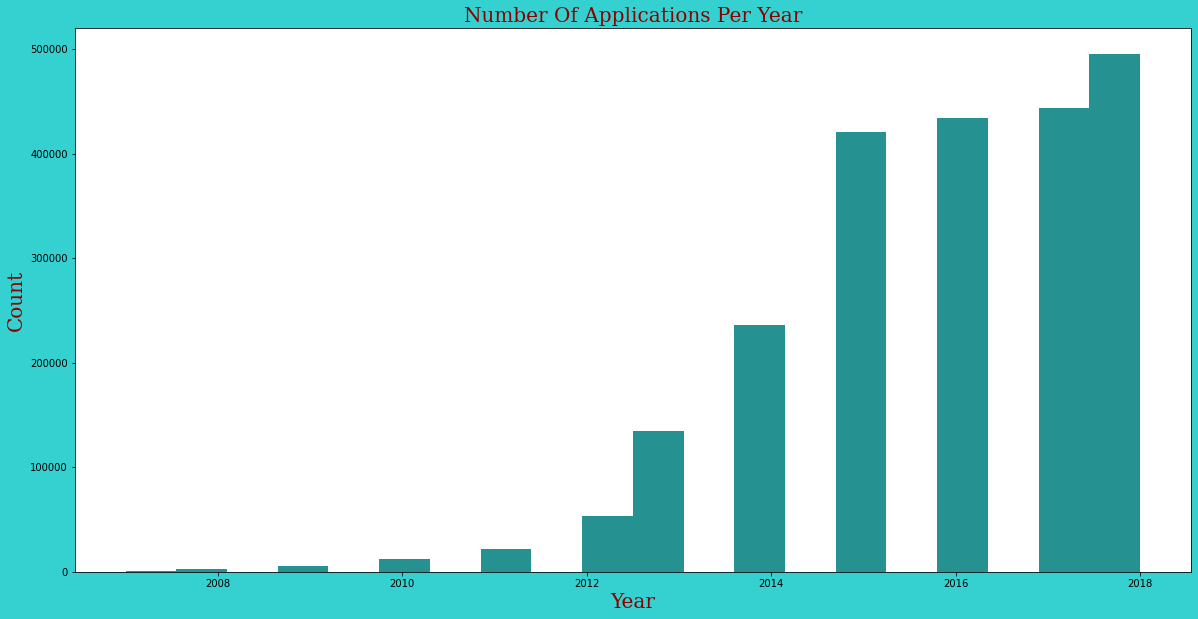

In [28]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }
plt.figure(figsize=(20,10),facecolor='#35D1D0')
plt.hist(eda_df['issue_d_year'], bins=20,histtype='bar', color = '#259190')
plt.title('Number Of Applications Per Year',fontdict=font)
plt.xlabel('Year',fontdict=font)
plt.ylabel('Count',fontdict=font)
plt.plot()

In [0]:
# eda_df['issue_d_year'].value_counts(dropna = False).plot(kind = 'bar')

In [0]:
eda_df['issue_d_year'].value_counts(dropna = False)

2018.0    495242
2017.0    443579
2016.0    434407
2015.0    421095
2014.0    235629
2013.0    134814
2012.0     53367
2011.0     21721
2010.0     12537
2009.0      5281
2008.0      2393
2007.0       603
NaN           33
Name: issue_d_year, dtype: int64

**2. Default Volume**

In [0]:
eda_df.loan_status.unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [0]:
eda_df.loan_status.value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

**3. Average Interest Rate.**

In [0]:
print("Minimum interest rate: ",eda_df.int_rate.min())
print("\nMaximum interest rate: ",eda_df.int_rate.max())
print("\nMean interest rate: ",eda_df.int_rate.mean())
print("\nMode interest rate: ",eda_df.int_rate.mode())

Minimum interest rate:  5.31

Maximum interest rate:  30.99

Mean interest rate:  13.092829114936396

Mode interest rate:  0    11.99
dtype: float64


In [0]:
eda_df.issue_d_year.unique()

array([2015.,   nan, 2018., 2017., 2016., 2014., 2011., 2010., 2009.,
       2008., 2007., 2013., 2012.])

In [0]:
sum(eda_df[eda_df['issue_d_year'] == 2007.0]['int_rate'])/len((eda_df[eda_df['issue_d_year'] == 2007.0]['int_rate']).index)

11.825107794361525

In [0]:
avgintrate_dict = {}
for y in [2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017., 2018.]:
  # print(str(int(y))+"_int_avg : ",round(sum(eda_df[eda_df['issue_d_year'] == y]['int_rate'])/len((eda_df[eda_df['issue_d_year'] == y]['int_rate']).index),2))
  avgintrate_dict.update({str(int(y)) : round(sum(eda_df[eda_df['issue_d_year'] == y]['int_rate'])/len((eda_df[eda_df['issue_d_year'] == y]['int_rate']).index),2)})

In [33]:
avgintrate_dict

{'2007': 11.83,
 '2008': 12.06,
 '2009': 12.44,
 '2010': 11.99,
 '2011': 12.22,
 '2012': 13.64,
 '2013': 14.53,
 '2014': 13.77,
 '2015': 12.6,
 '2016': 13.04,
 '2017': 13.24,
 '2018': 12.73}

[]

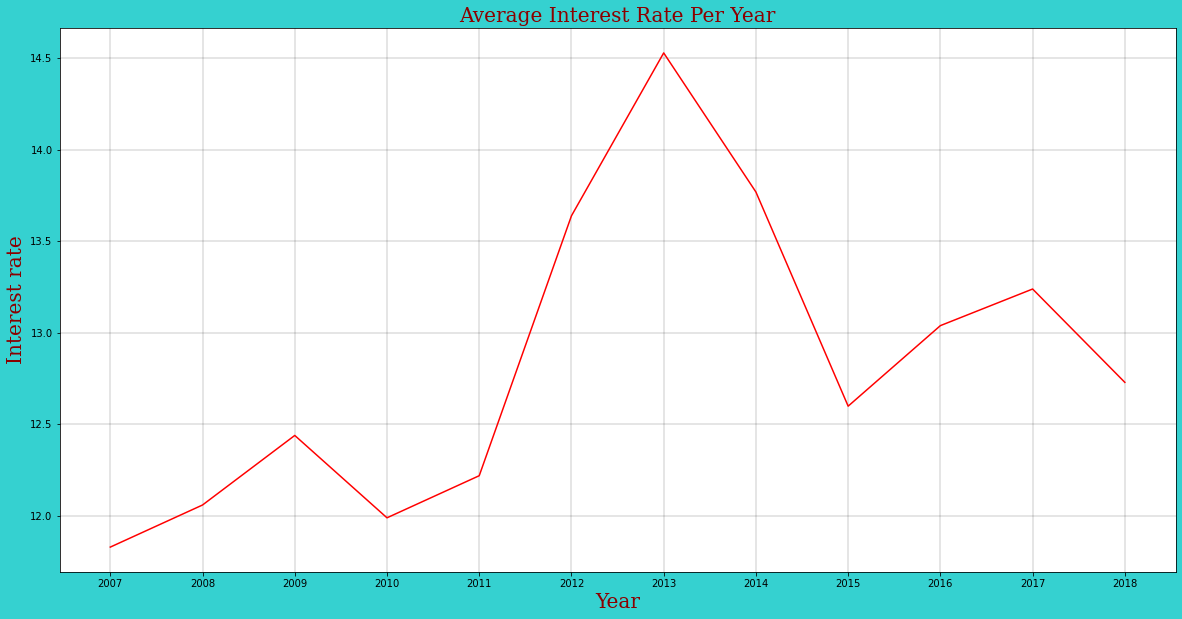

In [34]:
plt.figure(figsize=(20,10),facecolor='#35D1D0') 
plt.plot(list(avgintrate_dict.keys()), list(avgintrate_dict.values()),color= 'red')
plt.title('Average Interest Rate Per Year',fontdict=font)
plt.ylabel('Interest rate',fontdict=font)
plt.xlabel('Year',fontdict=font)
plt.grid(color='black', linestyle='-', linewidth=0.2)
# plt.bar(list(avgintrate_dict.keys()), list(avgintrate_dict.values()), color="blue")
# plt.savefig('ID modelo: model accuracy.png')
# plt.clf()
plt.plot()

**4. Loan Purpose**

In [37]:
eda_df.purpose.unique()

array(['debt_consolidation', 'small_business', 'home_improvement',
       'major_purchase', 'credit_card', 'other', 'house', 'vacation',
       'car', 'medical', 'moving', 'renewable_energy', 'wedding',
       'educational', nan], dtype=object)

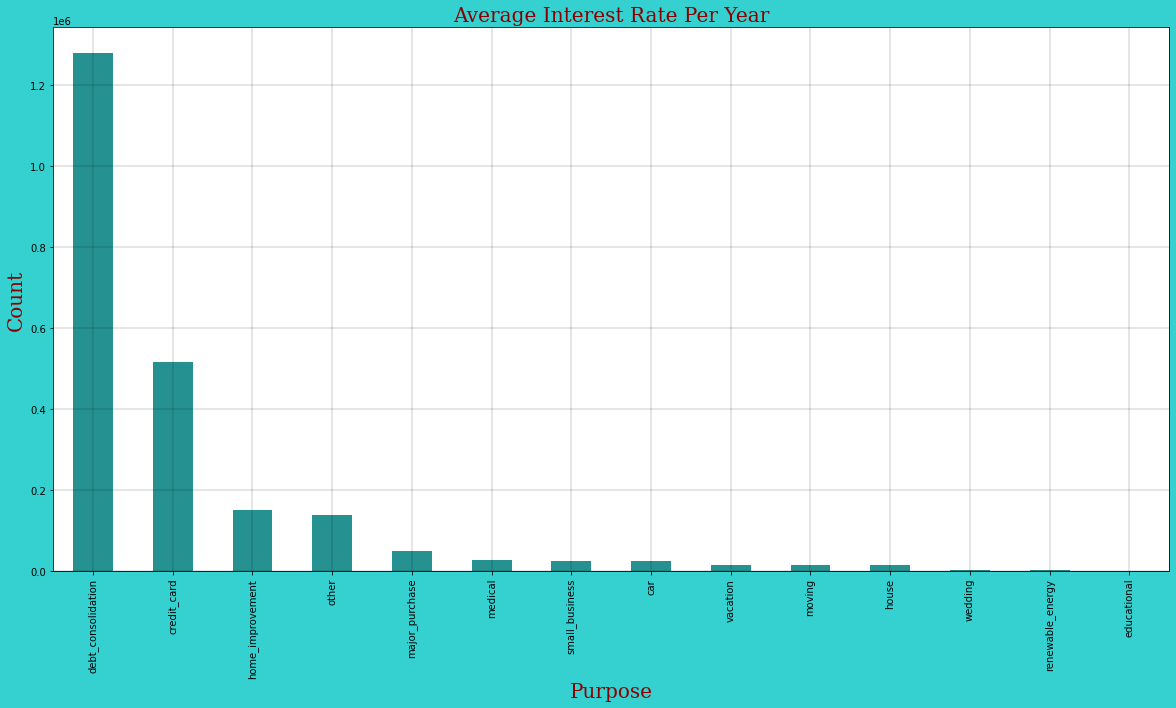

In [49]:
plt.figure(figsize=(20,10),facecolor='#35D1D0') 
eda_df.purpose.value_counts().plot(kind = 'bar', color = '#259190')
# plt.plot(eda_df.purpose.value_counts(),color= 'red')
plt.title('Average Interest Rate Per Year',fontdict=font)
plt.ylabel('Count',fontdict=font)
plt.xlabel('Purpose',fontdict=font)
plt.grid(color='black', linestyle='-', linewidth=0.2)


In [50]:
eda_df.purpose.value_counts()

debt_consolidation    1277877
credit_card            516971
home_improvement       150457
other                  139440
major_purchase          50445
medical                 27488
small_business          24689
car                     24013
vacation                15525
moving                  15403
house                   14136
wedding                  2355
renewable_energy         1445
educational               424
Name: purpose, dtype: int64

**5. Loan Grades**